# Titanic Survival Prediction Using Machine Learning

In [26]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.shape

(891, 12)

<AxesSubplot:>

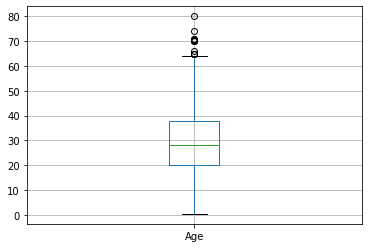

In [2]:
plot1=df.boxplot("Age")
plot1

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
Not_Survived= df[df.Survived==0]
Not_Survived.shape

(549, 12)

In [5]:
Survived= df[df.Survived==1]
Survived.shape

(342, 12)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

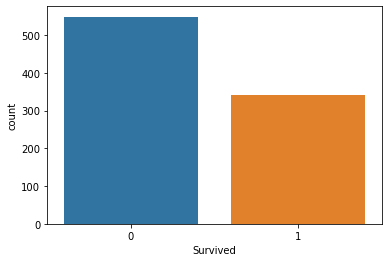

In [6]:
sns.countplot(df['Survived'],label="Count")

In [7]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


<AxesSubplot:xlabel='Sex'>

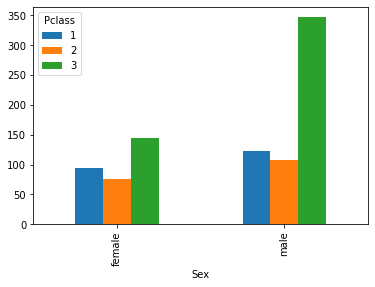

In [8]:
pd.crosstab(df.Sex,df.Pclass).plot(kind='bar')

Female percentage having first or second class is higher than male passengers. 

<AxesSubplot:xlabel='Sex'>

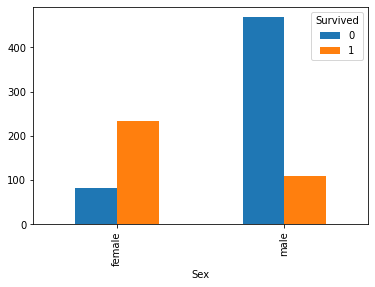

In [9]:
pd.crosstab(df.Sex,df.Survived).plot(kind='bar')

Survived Female percentage is higher than male passengers.

# According to the graphs,                                                      
Females are most likely to survive                                                                      
Passengers having First class are most likely to survive                                      
Passengers having higher Fare are most likely to survive                                         
Younger Passengers are most likely to survive                                                                                   

# Identify the features depend on survival - Pclass, Sex, Age, Fare

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.drop(['PassengerId','Name','Parch','SibSp','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [12]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [13]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [14]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le_Sex = LabelEncoder()

In [17]:
inputs['Sex'] = le_Sex.fit_transform(inputs['Sex'])

In [18]:
inputs

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


dataset is large. so we divide our dataset to 2 parts.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [21]:
len(x_train)

712

In [22]:
len(x_test)

179

# Use Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
model.score(x_test,y_test)

0.8659217877094972